#SMS Spam Classification 

**Loading the Data**

https://www.kaggle.com/uciml/sms-spam-collection-dataset

**Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

**Importing the dataset**

In [10]:
dataSet = pd.read_csv('/content/drive/My Drive/data/SMSSpamCollection.txt', 
                      delimiter = '\t', 
                      header = None,
                      names = ['class', 'text'])

In [11]:
# print out some data
print('Data shape (rows, cols): ', dataSet.shape)
dataSet.head(10)

Data shape (rows, cols):  (5572, 2)


,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [13]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [15]:
spam = dataSet[dataSet['class'] == 'spam'].shape[0]
ham = dataSet[dataSet['class'] == 'ham'].shape[0]

Spam:		 747
Ham:		 4825
Spam Percentage: 0.13406317300789664



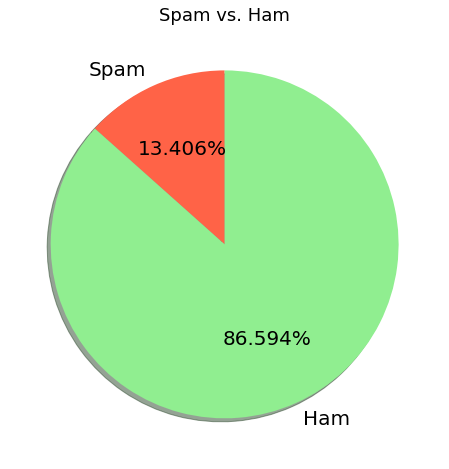

In [16]:
spam_percentage = spam / (spam + ham)

print('Spam:\t\t', spam)
print('Ham:\t\t', ham)
print('Spam Percentage:', spam_percentage, end='\n\n')

plt.figure(figsize=(12, 8))
font = {'weight': 'normal','size': 20}
plt.rc('font', **font)
plt.title('Spam vs. Ham', size=18)
plt.pie([spam, ham], labels=['Spam', 'Ham'], colors=['tomato', 'lightgreen'], autopct='%1.3f%%', shadow=True, startangle=90)
plt.show()

In [29]:
dataSet['class'].replace('ham', 0, inplace=True)
dataSet['class'].replace('spam', 1, inplace=True)
dataSet

,class,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


**Importing NLTK Library**

In [17]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
n =  dataSet.shape[0]
corpus = []
ps = PorterStemmer()

for i in range(n):
    text = re.sub('[^a-zA-Z]', ' ', dataSet['text'][i].lower())
    text = text.split()  # Spliting text into words
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]  # Removing stopwords & # stemming
    text = ' '.join(text)  #Joining text
    corpus.append(text)

**Splitting the dataset into the Training set and Test set**

In [30]:
X = corpus
y = dataSet.iloc[:, 0].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

**Features Extraction**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train = cv.fit_transform(X_train).toarray()
X_test = cv.transform(X_test).toarray()

In [20]:
cv.vocabulary_

{'go': 1881,
 'good': 1896,
 'problem': 3656,
 'still': 4464,
 'need': 3091,
 'littl': 2657,
 'experi': 1520,
 'understand': 4978,
 'american': 156,
 'custom': 1048,
 'voic': 5120,
 'secret': 4065,
 'admir': 56,
 'reveal': 3899,
 'think': 4744,
 'special': 4374,
 'call': 661,
 'opt': 3294,
 'repli': 3870,
 'stop': 4473,
 'per': 3436,
 'msg': 3007,
 'recd': 3806,
 'cust': 1046,
 'care': 694,
 'ok': 3254,
 'huh': 2176,
 'hyde': 2195,
 'park': 3389,
 'mel': 2860,
 'ah': 96,
 'opp': 3290,
 'got': 1912,
 'confus': 930,
 'anyway': 204,
 'tt': 4913,
 'best': 448,
 'choic': 802,
 'den': 1140,
 'juz': 2459,
 'take': 4623,
 'hope': 2139,
 'piss': 3499,
 'rememb': 3855,
 'gone': 1893,
 'sister': 4231,
 'someth': 4329,
 'accordingli': 32,
 'repeat': 3867,
 'text': 4703,
 'word': 5321,
 'mobil': 2947,
 'phone': 3475,
 'send': 4087,
 'wat': 5169,
 'da': 1062,
 'model': 2953,
 'num': 3206,
 'ur': 5022,
 'sorri': 4351,
 'later': 2570,
 'worri': 5329,
 'photo': 3477,
 'shoot': 4169,
 'went': 5220,
 'we

In [83]:
def report(y_test, y_pred):
  from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
  import seaborn as sns

  cm = confusion_matrix(y_test, y_pred)
  print('Accuracy:', accuracy_score(y_test, y_pred), sep='\t')
  print('Precision:', precision_score(y_test, y_pred), sep='\t')
  print('Recall:', recall_score(y_test, y_pred), sep='\t\t')
  print('F1:', f1_score(y_test, y_pred), sep='\t\t')
  print('\n')

  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt = 'd', annot_kws={"size": 35}).set_title('Confusion Matrix')
  plt.show()

##Training The Model Using GaussianNB

Accuracy:	0.9813352476669059
Precision:	0.9877300613496932
Recall:		0.8702702702702703
F1:		0.925287356321839




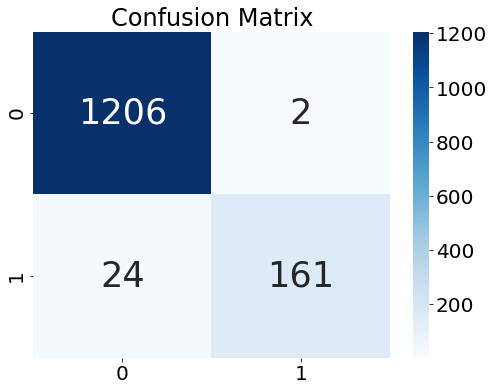

In [84]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB(var_smoothing=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)

##Training The Model Using BernoulliNB

Accuracy:	0.9899497487437185
Precision:	1.0
Recall:		0.9243243243243243
F1:		0.9606741573033708




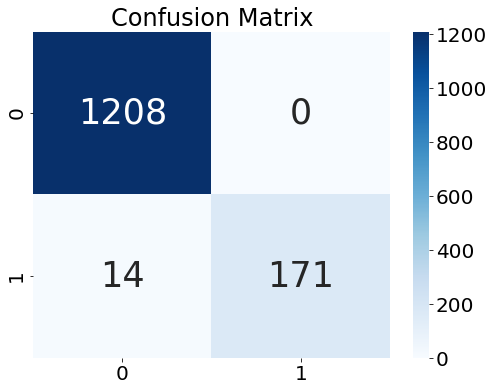

In [85]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB(alpha=0.01)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)

##Training The Model Using ComplementNB

Accuracy:	0.9734386216798278
Precision:	0.87
Recall:		0.9405405405405406
F1:		0.903896103896104




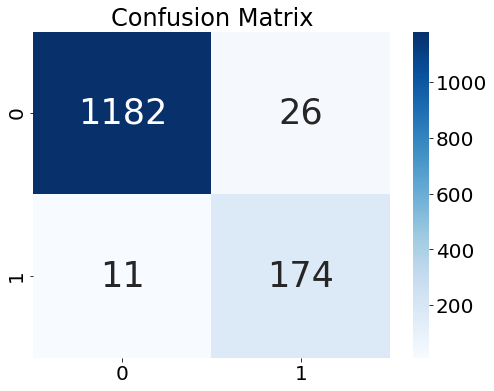

In [86]:
from sklearn.naive_bayes import ComplementNB

model = ComplementNB(alpha=0.02)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)

##Training The Model Using MultinomialNB

Accuracy:	0.9885139985642498
Precision:	0.9668508287292817
Recall:		0.9459459459459459
F1:		0.9562841530054644




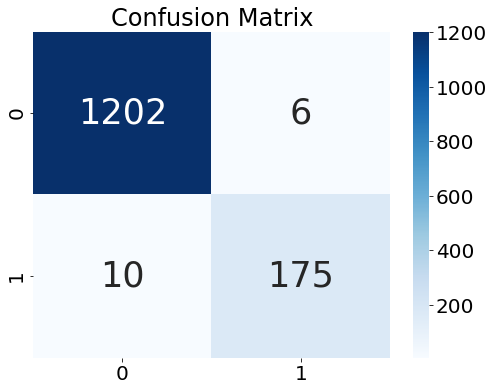

In [87]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB(alpha = 0.3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)

##Training The Model Using XGBClassifier

Accuracy:	0.9734386216798278
Precision:	0.9933333333333333
Recall:		0.8054054054054054
F1:		0.8895522388059701




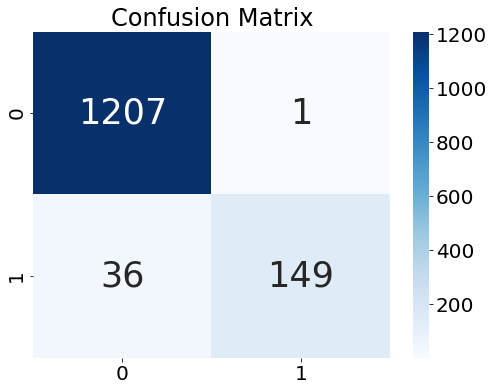

In [88]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)

##Training The Model Using GradientBoostingClassifier

Accuracy:	0.9755922469490309
Precision:	0.9870967741935484
Recall:		0.827027027027027
F1:		0.9




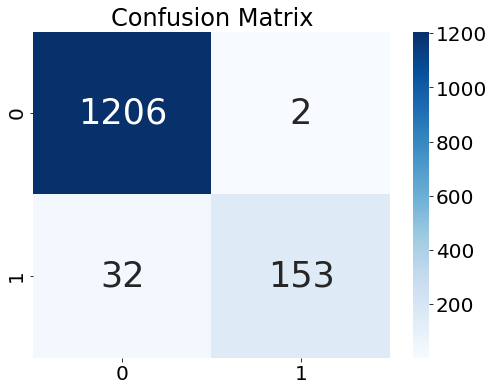

In [165]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state = 0)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)

##Training The Model Using AdaBoostClassifier

Accuracy:	0.9791816223977028
Precision:	0.9642857142857143
Recall:		0.8756756756756757
F1:		0.9178470254957507




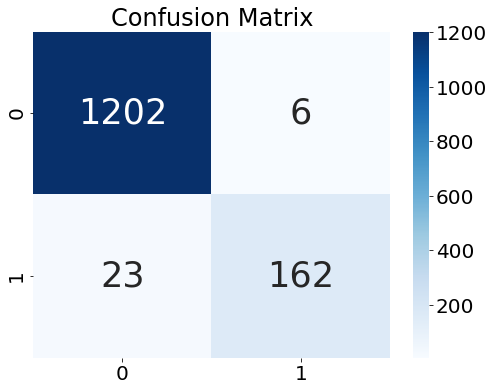

In [168]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(random_state = 0)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)

##Training The Model Using SVC

Accuracy:	0.9842067480258435
Precision:	1.0
Recall:		0.8810810810810811
F1:		0.9367816091954023




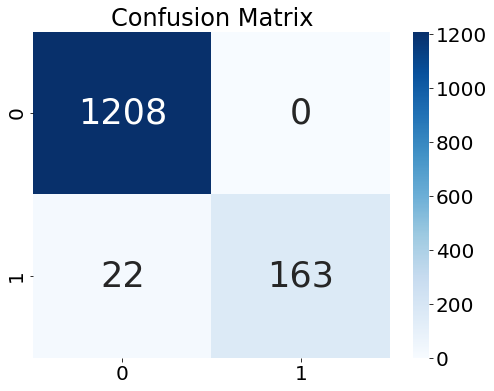

In [181]:
from sklearn.svm import SVC

model = SVC(kernel = 'rbf',
            random_state = 0)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)

Accuracy:	0.9842067480258435
Precision:	0.9553072625698324
Recall:		0.9243243243243243
F1:		0.9395604395604397




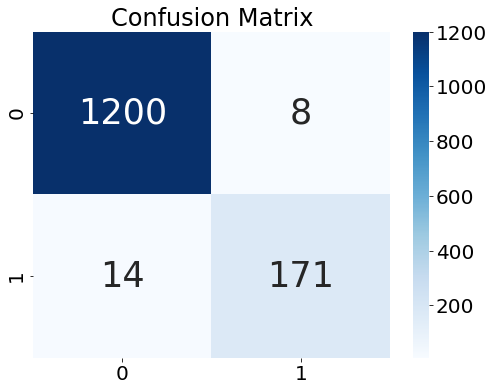

In [179]:
from sklearn.svm import SVC

model = SVC(kernel = 'linear',
            gamma = 0.01,
            random_state = 0)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)

##Training The Model Using ANN

Epoch 1/5
131/131 [==============================] - 0s 3ms/step - loss: 0.5052 - recall_35: 0.2242
Epoch 2/5
131/131 [==============================] - 0s 3ms/step - loss: 0.1660 - recall_35: 0.8345
Epoch 3/5
131/131 [==============================] - 0s 3ms/step - loss: 0.0525 - recall_35: 0.9448
Epoch 4/5
131/131 [==============================] - 0s 3ms/step - loss: 0.0254 - recall_35: 0.9733
Epoch 5/5
131/131 [==============================] - 0s 3ms/step - loss: 0.0160 - recall_35: 0.9786
Accuracy:	0.9921033740129217
Precision:	1.0
Recall:		0.9405405405405406
F1:		0.9693593314763231




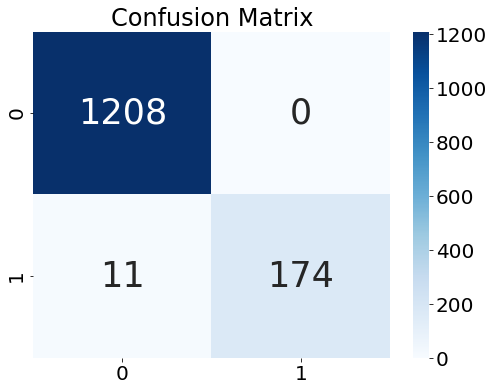

In [140]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initializing the ANN
ann = Sequential()

# Adding the input layer and the first hidden layer
ann.add(Dense(units=6, activation='relu'))

# Adding the second hidden layer
ann.add(Dense(units=6, activation='relu'))

# Adding the third hidden layer
ann.add(Dense(units=6, activation='relu'))

# Adding the output layer
ann.add(Dense(units=1, activation='sigmoid'))

# Compiling the ANN
ann.compile(optimizer = 'adam', 
            loss = 'binary_crossentropy', 
            metrics = tf.metrics.Recall())

# Training the ANN on the Training set
ann.fit(X_train, y_train, 
        batch_size = 32, 
        epochs = 5)

# Predicting the Test set results
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

report(y_test, y_pred)